In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
import pandas as pd

In [2]:
print(tf.__version__)

2.5.0


In [3]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [4]:
import keras

print(keras.__version__)

2.5.0


In [5]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16349010356941102438
]


In [6]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)



In [7]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['../../../../archive/seg_train/seg_train', '../../../../archive/seg_test/seg_test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [8]:
(train_images, train_labels), (test_images, test_labels) = load_data()

  7%|▋         | 154/2191 [00:00<00:01, 1525.60it/s]

Loading ../../../../archive/seg_train/seg_train


 26%|██▌       | 113/437 [00:00<00:00, 1119.46it/s]

Loading ../../../../archive/seg_test/seg_test


100%|██████████| 501/501 [00:00<00:00, 1187.57it/s]


In [9]:
#how many of each?
train_labels.shape
test_labels.shape


(3000,)

In [10]:
train_images = train_images.reshape((-1,150,150,3)).astype('float32') / 255.0
test_images = test_images.reshape((-1,150,150,3)).astype('float32') / 255.0

In [11]:
train_dist = pd.DataFrame(train_labels,columns=['labels'])

In [12]:
class_names

['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']

In [13]:
test_dist = pd.DataFrame(test_labels,columns=['labels'])

In [14]:
train_dist

,labels
0,3
1,3
2,3
3,3
4,3
...,...
14029,1
14030,1
14031,1
14032,1


In [15]:
class_map = {0:'mountain',1:'street',2:'glacier',3:'buildings',4:'sea',5:'forest'}
train_dist['labels'] = train_dist['labels'].map(class_map)
test_dist['labels'] = test_dist['labels'].map(class_map)


In [16]:
import seaborn as sns

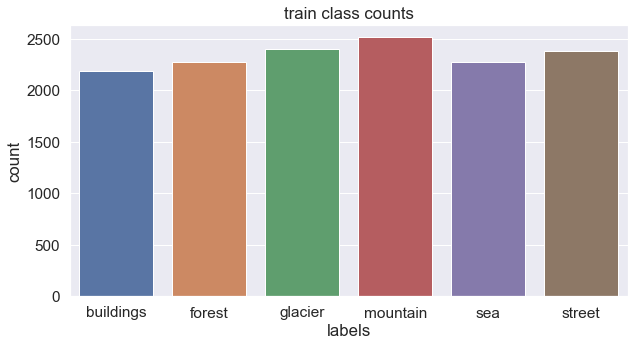

In [17]:
sets = [train_dist,test_dist]

fig, ax = plt.subplots(figsize=(10,5))

ax = sns.countplot(x='labels',data=sets[0])
ax = plt.title('train class counts')

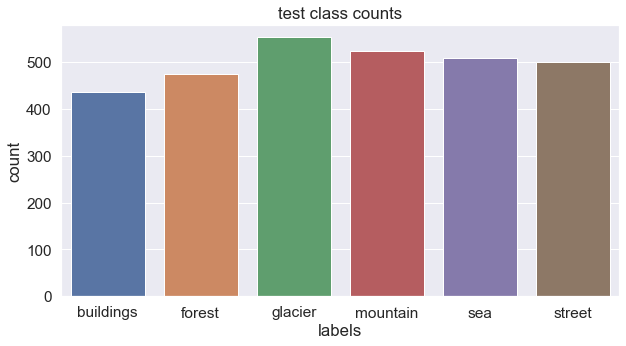

In [18]:
fig, ax = plt.subplots(figsize=(10,5))

ax = sns.countplot(x='labels',data=sets[1])
ax = plt.title('test class counts')

How well does it perform on each class. Which ones is it best at? are there any two it can't diff btwn. Is there a way to see in an img what the network does btwn the layers. i.e. shallow net import vs deeper net. Using lime img class with keras. Obj in img that it need to focus on. Maybe PCA for color in theory to get one PC for color or greyscale it. Or PCA for reducing dimesionality.

Deployment, demo maybe with LIME after to show btwn layers. predetermined image to model and lime to maintain comprehensibility for viewers. 

color compression ideas:

PCA
greyscale
something else?


How to verify that adding layers helps the model?

how fast it converges
how many epochs it takes with a set batch size
loss at stop?
difference in train and val metrics

In [19]:
from tensorflow.keras.preprocessing.image import array_to_img

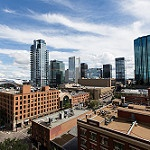

In [20]:
array_to_img(train_images[1])

In [21]:
blue,green,red = cv2.split(train_images[1]) 

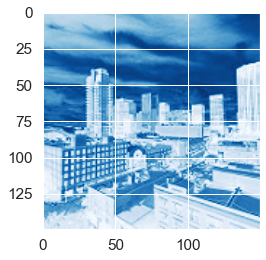

In [22]:
plt.imshow(blue,interpolation='bilinear',cmap='Blues')

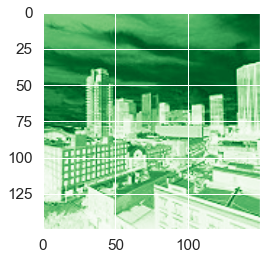

In [23]:
plt.imshow(green,interpolation='bilinear',cmap='Greens')

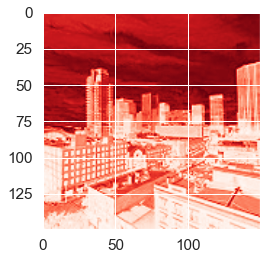

In [24]:
plt.imshow(red,interpolation='bilinear',cmap='Reds')

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA(110)

In [27]:
#Applying to red channel and then applying inverse transform to transformed array.
red_transformed = pca.fit_transform(red)
red_inverted = pca.inverse_transform(red_transformed)
 
#Applying to Green channel and then applying inverse transform to transformed array.
green_transformed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transformed)
 
#Applying to Blue channel and then applying inverse transform to transformed array.
blue_transformed = pca.fit_transform(blue)
blue_inverted = pca.inverse_transform(blue_transformed)

In [28]:
img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)

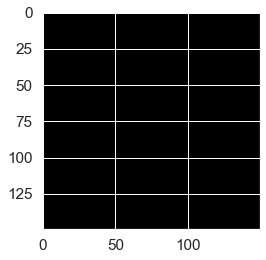

In [29]:
plt.imshow(img_compressed)

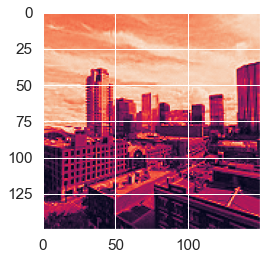

In [30]:
plt.imshow(red_inverted)

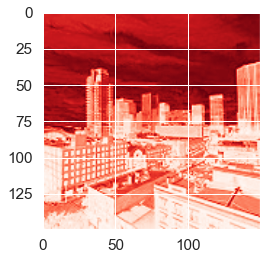

In [31]:
#red after being reconstructed from 20 PCs
plt.imshow(red,interpolation='bilinear',cmap='Reds')

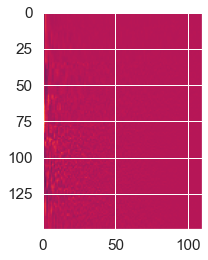

In [32]:
plt.imshow(red_transformed)

In [33]:
train_img_reshaped = train_images.reshape(train_images.shape[0],-1)
test_img_reshaped = test_images.reshape(test_images.shape[0],-1)

In [34]:
train_img_reshaped[1].shape

(67500,)

In [35]:
train_labels.shape

(14034,)

In [36]:
from tensorflow.keras import models, layers

In [37]:
model = models.Sequential()

In [38]:
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))

In [39]:
model.add(layers.Dense(6,activation='softmax'))

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               5308544   
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 7

In [41]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [42]:
history = model.fit(train_images,train_labels,batch_size=16,epochs=2,validation_data=(test_images,test_labels))

Epoch 1/2
878/878 [==============================] - 155s 175ms/step - loss: 0.8746 - acc: 0.6746 - val_loss: 0.7184 - val_acc: 0.7257
Epoch 2/2
878/878 [==============================] - 149s 170ms/step - loss: 0.5171 - acc: 0.8149 - val_loss: 0.7054 - val_acc: 0.7377


In [44]:
model.evaluate(train_images,train_labels)

439/439 [==============================] - 33s 76ms/step - loss: 0.4101 - acc: 0.8459


[0.41008129715919495, 0.8458743095397949]

In [45]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

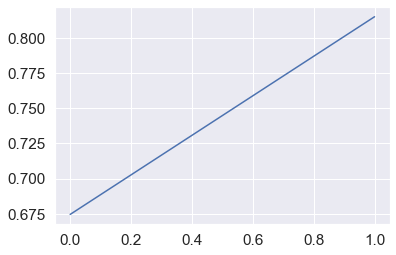

In [46]:
plt.plot(range(0,2),history.history['acc'])

In [47]:
import lime

In [48]:
from lime import lime_image
from skimage.segmentation import mark_boundaries

In [49]:
import random

In [50]:
explainer = lime_image.LimeImageExplainer(random_state=1)

In [51]:
explanation = explainer.explain_instance(train_images[10], model.predict)
plt.imshow(train_images[10])
temp, mask = explanation.get_image_and_mask(model.predict(train_images[10].reshape((1,28,28,3))).argmax(axis=1)[0], positive_only=True, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

ValueError: Buffer dtype mismatch, expected 'double' but got 'float'